# How Connected is NYC?

### Jacqueline Wu

Internet access is now considered to be a global public resource along with food, shelter, and water. I chose this dataset because I am interested in the accessibility and connectivity of New York City. Using open source datasets, these are some questions I'm starting to ask:

+ Which areas are most/least connected?
+ Who is paying for this "free" internet?
+ Can an urban resident live only off of the city's provisions?

**Dataset:** NYC Wi-Fi Hotspot Locations

**Source:** [NYC Open Data](https://data.cityofnewyork.us/City-Government/NYC-Wi-Fi-Hotspot-Locations/yjub-udmw)

------


### **1. Import data and set up Python environment**

In [93]:
# Import matplotlib, numpy, pandas, folium, and seaborn.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium

In [94]:
import seaborn as sns

In [4]:
# Use %matplotlib inline to make plots appear in the notebook.
%matplotlib inline

In [5]:
# Read the dataset in to a DataFrame with pd.read_csv (or appropriate file type).
nycwifi = pd.read_csv('data/NYC_Wi-Fi_Hotspot_Locations.csv')

In [86]:
# List the different variable types available in the set.
nycwifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 29 columns):
OBJECTID                3179 non-null int64
Borough                 3179 non-null object
Type                    3179 non-null object
Provider                3179 non-null object
Name                    2921 non-null object
Location                3179 non-null object
Latitude                3179 non-null float64
Longitude               3179 non-null float64
X                       3179 non-null float64
Y                       3179 non-null float64
Location_T              3179 non-null object
Remarks                 2608 non-null object
City                    3179 non-null object
SSID                    3179 non-null object
SourceID                2090 non-null object
Activated               1743 non-null object
BoroCode                3179 non-null int64
BoroName                3179 non-null object
NTACode                 3179 non-null object
NTAName                 3179 non-nul

#### From the initial data scan, we can already identify the data we will need: "Borough", "Provider", "Latitude", and "Longitude"
------

### **2. What is the wifi access by borough?**

In [55]:
# Select a column that is a categorical variable, and perform a .groupby() on this column.
boro = nycwifi.groupby('Borough')['Name'].count()
boro

Borough
BK     594
BX     297
MN    1419
QU     516
SI      95
Name: Name, dtype: int64

In [56]:
boro.index

Index(['BK', 'BX', 'MN', 'QU', 'SI'], dtype='object', name='Borough')

<BarContainer object of 5 artists>

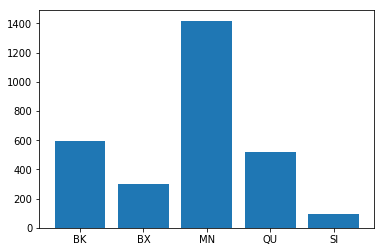

In [57]:
plt.bar(boro.index, boro)

#### Manhattan (MN) has the most Internet hotspots -- roughly equal to all the others combined.

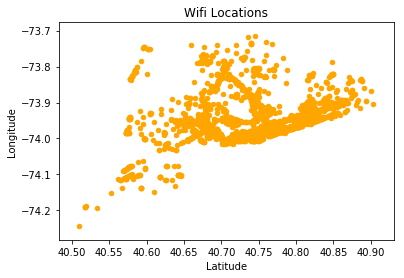

In [20]:
nycwifi.plot.scatter(x='Latitude',y='Longitude', c='Orange', title='Wifi Locations')

In [91]:
nycwifi[['Latitude', 'Longitude']].mean()

Latitude     40.742141
Longitude   -73.948829
dtype: float64

In [110]:
m = folium.Map(location = [nycwifi.Latitude[0], nycwifi.Longitude[0]], zoom_start = 11, tiles='Stamen Toner',)
for index, row in nycwifi.iterrows():
    if row["Borough"]=="QU":
        markerCol="#E37222" # tangerine
    elif row["Borough"]=="BK":
        markerCol="#0A8A9F" # teal
    elif row["Borough"]=="BX":
        markerCol="#f442e2" # pink
    elif row["Borough"]=="SI":
        markerCol="#00d114" # green
    else:
        markerCol="blue" # MN 

    folium.CircleMarker(location=(row["Latitude"],
                                  row["Longitude"]),
                        radius = 1.0,
                        color=markerCol,
                        fill=True,
                        popup=folium.Popup(labelNames["Name"])).add_to(m)
m

#### Manhattan=Blue; Bronx=Pink; Queens=Orange; Brooklyn=Teal; Staten Island=Green
------

### **3. What types of wifi services are provided?**

In [112]:
nycwifi.groupby(nycwifi['Location_T'])['Borough'].count()

Location_T
Indoor                                           125
Indoor AP - Community Center - Activity Rm 1       1
Indoor AP - Community Center - Activity Rm 2       1
Indoor AP - Community Center - Cafeteria           1
Indoor AP - Community Center - Computer Rm         1
Indoor AP - Community Center - Gym                 1
Indoor AP - North Maintenance Area                 3
Indoor AP - North Management Office                2
Indoor AP - Queens Public Library                  1
Indoor AP - South Maintenance Area                 3
Indoor AP - South Management Office                2
Library                                          214
Outdoor                                          696
Outdoor Kiosk                                   1731
Outdoor TWC Aerial                               121
Subway Station                                   276
Name: Borough, dtype: int64

#### Indoor locations (community centers and libraries) are largely inaccessible during closed hours and Subway Stations can only be accessed with payment, technically not making them entirely "free". This eliminates 476 locations from the list.

### Now, let's look at the wifi accessibility of subway stations.

In [118]:
subwayWifi = nycwifi[nycwifi["Location_T"]=="Subway Station"]

In [120]:
m2 = folium.Map(location = [nycwifi.Latitude[0], nycwifi.Longitude[0]], zoom_start = 11, tiles='Stamen Toner',)
for index, row in subwayWifi.iterrows():
    if row["Borough"]=="QU":
        markerCol="#E37222" # tangerine
    elif row["Borough"]=="BK":
        markerCol="#0A8A9F" # teal
    elif row["Borough"]=="BX":
        markerCol="#f442e2" # pink
    elif row["Borough"]=="SI":
        markerCol="#00d114" # green
    else:
        markerCol="blue" # MN 
        
    folium.CircleMarker(location=(row["Latitude"],
                                  row["Longitude"]),
                        radius = 1.0,
                        color=markerCol,
                        fill=True).add_to(m2)
m2

#### While it looks like most stations in Manhattan have wifi, the outer boroughs are lacking (especially Queens) and Staten Island has none at all.
-----

### **4. Who is providing these services?**

In [63]:
nycwifi.groupby('Provider')['Borough'].count()

Provider
ALTICEUSA                   237
AT&T                         27
BPL                          59
Chelsea                      30
City Tech                    11
Downtown Brooklyn           100
Harlem                      128
LinkNYC - Citybridge       1731
Manhattan Down Alliance      36
NYCHA                        28
NYPL                         90
Partner                       2
QPL                          65
SPECTRUM                    343
Spot On Networks             16
Transit Wireless            276
Name: Borough, dtype: int64

[Text(0, 0, 'Spot On Networks'),
 Text(0, 0, 'ALTICEUSA'),
 Text(0, 0, 'Harlem'),
 Text(0, 0, 'SPECTRUM'),
 Text(0, 0, 'NYCHA'),
 Text(0, 0, 'AT&T'),
 Text(0, 0, 'LinkNYC - Citybridge'),
 Text(0, 0, 'Downtown Brooklyn'),
 Text(0, 0, 'NYPL'),
 Text(0, 0, 'BPL'),
 Text(0, 0, 'QPL'),
 Text(0, 0, 'Manhattan Down Alliance'),
 Text(0, 0, 'Transit Wireless'),
 Text(0, 0, 'City Tech'),
 Text(0, 0, 'Chelsea'),
 Text(0, 0, 'Partner')]

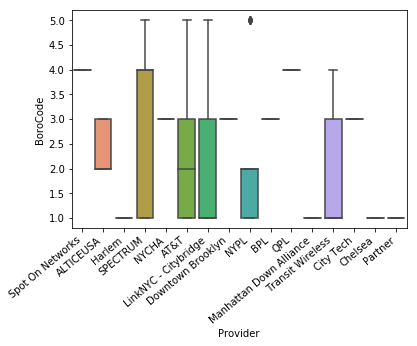

In [96]:
# Use the same column to make a boxplot.
ax = sns.boxplot('Provider', 'BoroCode', data = nycwifi)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### **Conclusions:** 
+ LinkNYC is the largest Internet provider, followed by SPECTRUM, AT&T, and ALTICEUSA.
+ Providers have their territories. For example: public libraries only serve their boroughs, and wealthier neighborhoods like Chelsea and Downtown Brooklyn sponsor themselves.

-----